# IMPORT AND READ DATASET

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bank_churn = pd.read_csv('../data/train.csv')
bank_churn.drop(columns=['id', 'CustomerId', 'Surname'], inplace=True)
bank_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


# CLEAN DATASET

In [68]:
bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [69]:
numeric_features = list(bank_churn.select_dtypes(include=['int', 'float']).columns)
categorical_features = list(bank_churn.select_dtypes(include=['object']).columns)

discrete_features = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
continuous_features = list(set(numeric_features)-set(discrete_features)-{'Exited'})

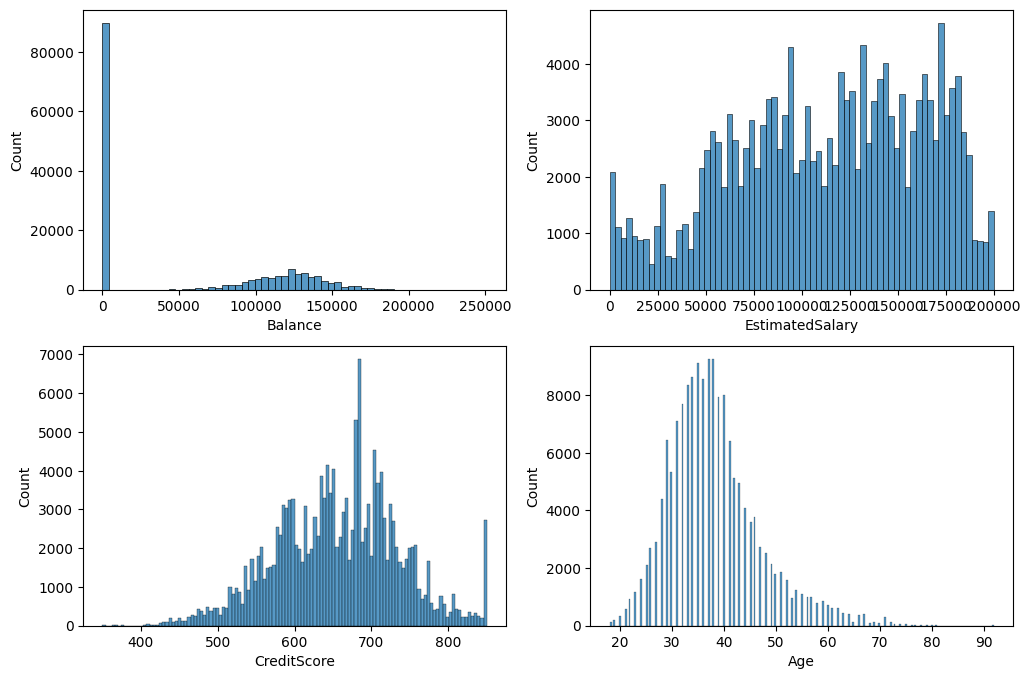

In [70]:
plt.figure(figsize=(12, 8))
idx = 1
for feature in continuous_features:
    plt.subplot(2, 2, idx)
    sns.histplot(bank_churn[feature])
    idx+= 1

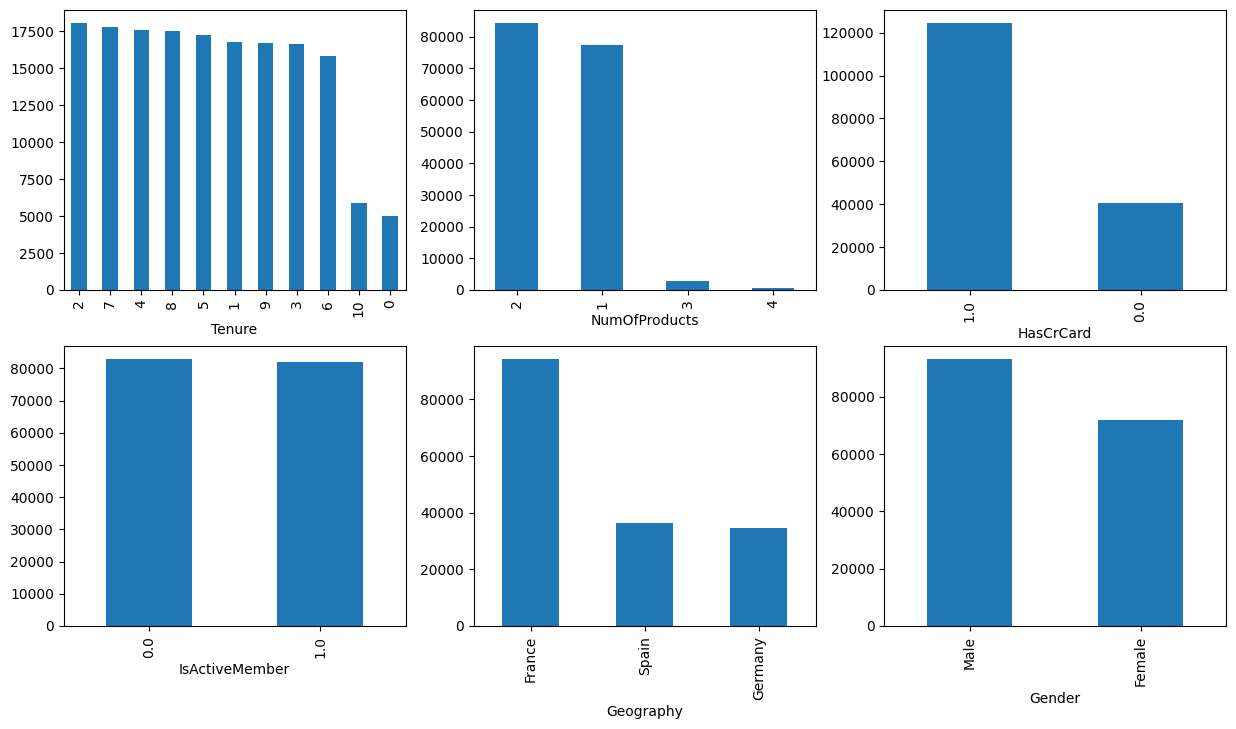

In [71]:
plt.figure(figsize=(15, 8))
idx = 1
for feature in (discrete_features + categorical_features):
    plt.subplot(2, 3, idx)
    bank_churn[feature].value_counts().plot.bar()
    idx+= 1

# BUILD MODEL

In [72]:
features = [
    'CreditScore',
    'Geography',
    'Gender',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'HasCrCard',
    'IsActiveMember',
    'EstimatedSalary'
]

X = bank_churn[features]
y = bank_churn['Exited']

numeric_features = list(X.select_dtypes(include=['int', 'float']).columns)
discrete_features = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
continuous_features = list(set(numeric_features)-set(discrete_features))
categorical_features = list(X.select_dtypes(include=['object']).columns)

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='error'))
])

data_prep = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, continuous_features),
        ('categorical', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('prep', data_prep),
    ('lr', LogisticRegression(C=.422, penalty="l1", solver="saga"))
])

In [77]:
pipeline

c:\Users\vietdh15\AppData\Local\anaconda3\envs\mlops\lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Balance', 'EstimatedSalary',
                                                   'CreditScore', 'Age']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Geography', 'Gender'])])),
                ('lr',
                 LogisticRegression(C=0.422, penalty='l1', solver='saga'))])

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

X_train= data_prep.fit_transform(X_train)

array([[-0.88465622, -0.18145448,  0.2775534 , ...,  2.        ,
         1.        ,  1.        ],
       [ 0.95696068, -0.19359144,  0.80227227, ...,  2.        ,
         1.        ,  0.        ],
       [-0.88465622,  0.84953803, -1.32158984, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.88465622,  1.09974221,  1.20205808, ...,  2.        ,
         1.        ,  0.        ],
       [-0.88465622, -1.74409271,  0.35251324, ...,  2.        ,
         1.        ,  1.        ],
       [ 1.27310181,  0.54607021,  0.12763372, ...,  1.        ,
         0.        ,  0.        ]])